두 개의 변수를 갖는 함수의 gradient descent 함수 만들기

In [274]:
def function_2(x):
    return x[0] ** 2 + x[1] **2

In [322]:
# x[0], x[1] 입력, gradient 반환 

def numerical_gradient(f,x): 
    h = 1e-4 # dx 
    grad = np.zeros_like(x) # 0벡터
    
    for idx in range(x.size): # x[0] , x[1] 
        tmp_val = x[idx]     
        x[idx] = tmp_val + h
        fxh1 = f(x)           
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1- fxh2) / (2*h) # x[idx]에 대해서만 미분
                                          
        x[idx]  = tmp_val
    
    return grad  # x[idx]에 대한 미분 값
    

In [323]:
numerical_gradient(function_2, np.array([0.0, 1]))

array([0., 2.])

In [386]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)



In [392]:
def gradient_descent(f, init_x, lr=0.01, step_num=10):
    x = init_x
    x_history = []

    for cnt in range(step_num):
        x_history.append(x.copy())        
        grad = numerical_gradient(f, x)
        x -= lr*grad
        
    return x, np.array(x_history)
    

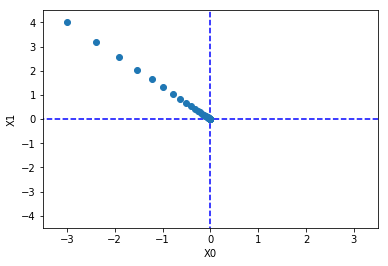

In [404]:
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, 0.1, 100)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()